Demonstrate that lazy primtives still produce 4th-order convergence for the nonlinear soundwave problem with the **teyssier** code.

In [1]:
from teyssier import weno, cons_to_prim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gamma = 1.4
rho0 = 1
cs0 = 1
P0 = 1 / gamma
A = 1e-5

data = []
for N in [32, 64, 128, 256]:
    for p in [0, 1, 2, 3]:

        def vp(x, t):
            return A * np.sin(2 * np.pi * (x - t)) - A**2 * (
                gamma + 1
            ) / 4 * 2 * np.pi * t * np.sin(4 * np.pi * (x - t))

        t, ut = weno(
            tend=1.0,
            n=N,
            cfl=0.8,
            ic_type="nonlinear wave",
            bc_type="periodic",
            riemann_solver="llf",
            time=p + 1,
            space=p + 1,
        )

        # convert Teyssier solution to primitive variables
        x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
        wt = cons_to_prim(ut[-1, :, :])

        # compute analytical solution
        v_ana = vp(x, t)

        data.append(dict(N=N, p=p, err=np.mean(np.abs(wt[1, :] - v_ana))))
df = pd.DataFrame(data)

cell= 32  itermax= 100000
Done  41 1.0249884485066383
cell= 32  itermax= 100000
Done  41 1.0249877378557697
cell= 32  itermax= 100000
Done  41 1.0249877527093734
cell= 32  itermax= 100000
Done  41 1.024987722679905
cell= 64  itermax= 100000
Done  81 1.012488222404178
cell= 64  itermax= 100000
Done  81 1.012487857282245
cell= 64  itermax= 100000
Done  81 1.0124878593302626
cell= 64  itermax= 100000
Done  81 1.012487855567344
cell= 128  itermax= 100000
Done  161 1.0062381107675569
cell= 128  itermax= 100000
Done  161 1.0062379266998704
cell= 128  itermax= 100000
Done  161 1.0062379269669883
cell= 128  itermax= 100000
Done  161 1.0062379264978802
cell= 256  itermax= 100000
Done  321 1.0031130553355936
cell= 256  itermax= 100000
Done  321 1.003112963026195
cell= 256  itermax= 100000
Done  321 1.0031129630600937
cell= 256  itermax= 100000
Done  321 1.0031129630015883


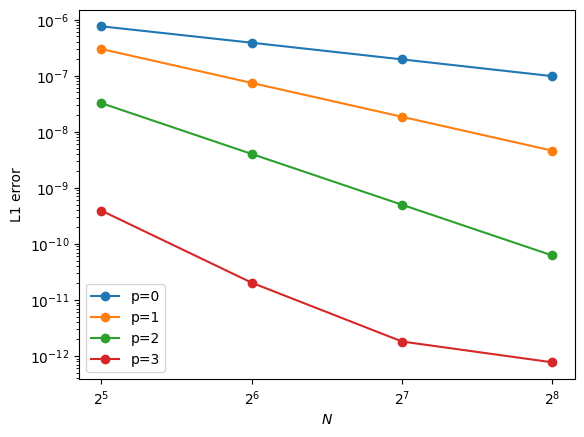

In [3]:
# plot error curves for different values of p
for p in df.p.unique():
    df_p = df[df.p == p]
    plt.plot(df_p.N, df_p.err, label=f"p={p}", marker="o")
plt.xscale("log", base=2)
plt.yscale("log")
plt.xlabel(r"$N$")
plt.ylabel("L1 error")
plt.legend()